# First

Introduce to Deep Learning

In [ ]:
import keras, tensorflow as tf

In [ ]:
(train_input, train_target), (test_input, test_target) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
train_input.shape, train_target.shape, test_input.shape, test_target.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

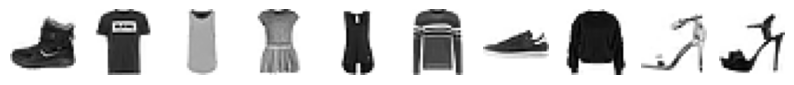

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
  ax[i].imshow(train_input[i], cmap="gray_r")
  ax[i].axis("off")
plt.show()

In [ ]:
labels = {
    0 : "티셔츠",
    1 : "바지",
    2 : "스웨터",
    3 : "드레스",
    4 : "코트",
    5 : "샌달",
    6 : "셔츠",
    7 : "스니커즈",
    8 : "가방",
    9 : "앵클부츠",
}
[labels[train_target[i]] for i in range(10)]

['앵클부츠', '티셔츠', '티셔츠', '드레스', '티셔츠', '스웨터', '스니커즈', '스웨터', '샌달', '샌달']

In [ ]:
import numpy as np
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

0-255 범위의 이미지 픽셀들을 0-1사이로 바꿔줌, 2D에서 1D로 flatten해줌

In [ ]:
train_scaled = train_input / 255.0 # 정수 나누기 정수 하면 결과가 정수이므로 실수로 나눔.
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled.shape, train_scaled[0, 200:220]

((60000, 784),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.27058824,
        0.81176471, 0.8745098 , 0.85490196, 0.84705882, 0.84705882,
        0.63921569, 0.49803922, 0.4745098 , 0.47843137, 0.57254902]))

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss="log_loss", max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
np.mean(scores["test_score"])

np.float64(0.8194166666666666)

## Keras : 고수준 딥러닝 라이브러리

In [ ]:
keras.config.backend()

'tensorflow'

In [ ]:
# 백엔드를 바꾸려면?
# import os
# os.environ["KERAS_BACKEND"] = "torch"

In [ ]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled,
    train_target,
    test_size=0.2,
    random_state=42
)
train_scaled.shape, train_target.shape, val_scaled.shape, val_target.shape

((48000, 784), (48000,), (12000, 784), (12000,))

## Define model

In [ ]:
inputs = keras.layers.Input(shape=(28*28,))
dense = keras.layers.Dense(10, activation="softmax")

model = keras.Sequential([
    inputs, dense
])

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",
    # target data가 one-hot벡터 형으로 준비 되어 있지 않고, 클래스 번호로만 있는 경우
    # sparse_categorical_crossentropy를 사용해야 한다!!
    # 그냥 categorical_crossentropy는 target data가 이미 one-hot형태일때 사용.
    metrics=["accuracy"]
    # loss이외에 더 측정해줬으면 하는 측도 추가
)
# compile은 Sequential을 어떻게 빠르게 돌릴지? 다른 형태로 미리 컴파일 함.

In [ ]:
model.fit(
    train_scaled,
    train_target,
    epochs=5
)

Epoch 1/5


ValueError: 'Fashion MNIST Model._Fashion MNIST Model_sequential_16_sequential_27_dense_47_kernel_velocity' is not a valid scope name. A scope name has to match the following pattern: ^[A-Za-z0-9_.\\/>-]*$

In [ ]:
model.evaluate(
    val_scaled,
    val_target
)

# Second

In [ ]:
import keras

In [ ]:
from torchvision.datasets import FashionMNIST
fm_train = FashionMNIST(root='.', train=True, download=True)
fm_test = FashionMNIST(root='.', train=False, download=True)
train_input = fm_train.data.numpy()
test_input = fm_test.data.numpy()
train_target = fm_train.targets.numpy()
test_target = fm_train.targets.numpy()

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 203kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.80MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 26.2MB/s]


In [ ]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled,
    train_target,
    test_size=0.2,
    random_state=42
)

## Activation Functions

- Sigmoid : 가장 처음 등장, 선형성을 없애고 0-1의 확률을 주기 위함.
-> 입력이 0이여도 출력이 0.5임
- Tanh : Sigmoid와 비슷하나, 입력이 0이면 출력이 0임. 범위는 -1부터 1이고 보편적으로 Sigmoid보다 나음. -> 거대한 출력에 대해 씹히는 경향이 있음
- ReLu : 큰 출력은 크게 출력 해줌.

## Define model

In [ ]:
inputs = keras.layers.Input(shape=(784,))
dense1 = keras.layers.Dense(100, activation="sigmoid")
# 모델의 층은 점점 줄어드는게 일반적인 가이드라인
dense2 = keras.layers.Dense(10, activation="softmax")

In [ ]:
model = keras.Sequential([
    inputs, dense1, dense2
])

In [ ]:
model.summary() # 입력층은 굳이 안보여줘서 2개의 레이어만 있는 것 처럼 보임.
# Output Shape이 (None, n)인 이유 => 한번에 처리하는 데이터의 개수가 None임.
# 학습할때 Batch의 크기가 None에 들어감.
# Param1 = 784*100(weight) + 100(bias)
# Param2 = 100*10(weight) + 10(bias)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1 = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(100, activation="sigmoid", name="Hidden Layer"),
    keras.layers.Dense(10, activation="softmax", name="Output Layer"),
])

In [ ]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden Layer (Dense)            │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output Layer (Dense)            │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Input(shape=(784,)))
model2.add(keras.layers.Dense(100, activation="sigmoid"))
model2.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7604 - loss: 0.7532
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8494 - loss: 0.4198
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8634 - loss: 0.3824
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8702 - loss: 0.3577
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8767 - loss: 0.3408


In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7635 - loss: 0.6722
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8544 - loss: 0.4019
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8694 - loss: 0.3574
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8796 - loss: 0.3320
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8844 - loss: 0.3229


## PyTorch

In [ ]:
from torchvision.datasets import FashionMNIST

fm_train = FashionMNIST(root=".", train=True, download=True)
fm_test = FashionMNIST(root=".", train=False, download=True)

In [ ]:
type(fm_train.data)

torch.Tensor

In [ ]:
fm_train.data.shape, fm_test.data.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [ ]:
fm_train.targets.shape, fm_test.targets.shape

(torch.Size([60000]), torch.Size([10000]))

In [ ]:
train_input = fm_train.data
train_target = fm_train.targets
train_scaled = train_input / 255.0

from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
  train_scaled, train_target, test_size=0.2, random_state=42
)

In [ ]:
import torch.nn as nn

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 100),
    nn.ReLU(),
    nn.Linear(100, 10),
)

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary
summary(model, input_size=(32, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [32, 10]                  --
├─Flatten: 1-1                           [32, 784]                 --
├─Linear: 1-2                            [32, 100]                 78,500
├─ReLU: 1-3                              [32, 100]                 --
├─Linear: 1-4                            [32, 10]                  1,010
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 2.54
Input size (MB): 0.10
Forward/backward pass size (MB): 0.03
Params size (MB): 0.32
Estimated Total Size (MB): 0.45

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=100, bias=True)
  (2): ReLU()
  (3): Linear(in_features=100, out_features=10, bias=True)
)

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [ ]:
for params in model.parameters():
  print(params.shape)

torch.Size([100, 784])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


In [ ]:
epochs = 5
batches = len(train_scaled)//32
for epoch in range(epochs):
  model.train()
  train_loss = 0
  for batch in range(batches):
    inputs = train_scaled[batch*32:(batch+1)*32].to(device)
    targets = train_target[batch*32:(batch+1)*32].to(device)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
  print(f"[epoch] : {epoch+1}, [loss] : {train_loss/batches:.4f}")

[epoch] : 1, [loss] : 0.5440
[epoch] : 2, [loss] : 0.4026
[epoch] : 3, [loss] : 0.3595
[epoch] : 4, [loss] : 0.3322
[epoch] : 5, [loss] : 0.3118


In [ ]:
model.eval()
with torch.no_grad():
  val_scaled = val_scaled.to(device)
  val_target = val_target.to(device)
  outputs = model(val_scaled)
  print(outputs)
  predict = torch.argmax(outputs, 1) # 어떤 클래스를 가장 높게 평가했는지 인덱스를 반환.
  corrects = (predict == val_target).sum().item()

accuracy = corrects/len(val_target)
accuracy

tensor([[ -5.4503, -18.0527,  -9.2595,  ...,  -4.7708,  10.1860, -12.0174],
        [ -1.6333, -12.5209,  -3.9782,  ...,  -6.9749,  11.5635,  -4.9203],
        [ -8.5259, -11.3270, -12.4425,  ...,   8.5715,  -5.1149,  -0.7067],
        ...,
        [ -1.7977, -11.7488,  -4.4767,  ...,  -2.4781,   8.8058,  -2.1759],
        [ -4.5496, -19.1834,  -6.4908,  ..., -11.5734,   8.5030, -15.1925],
        [ -0.6012, -12.3420,  -2.1002,  ...,  -2.6472,  -4.7083,  -1.3394]],
       device='cuda:0')


0.87225

# Third

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Input(shape=(28, 28)))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(100, activation="relu"))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation="softmax"))
  return model

In [4]:
model = model_fn()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [7]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

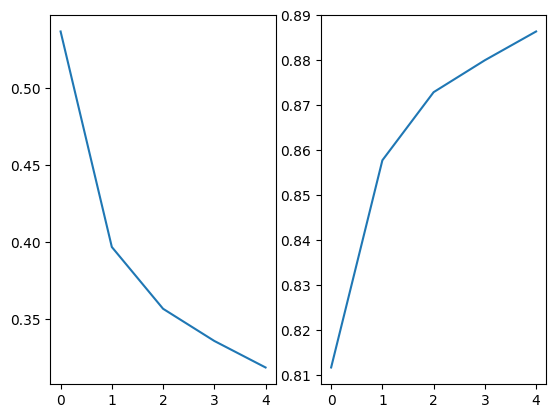

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(history.history["loss"])
ax[1].plot(history.history["accuracy"])
plt.show()

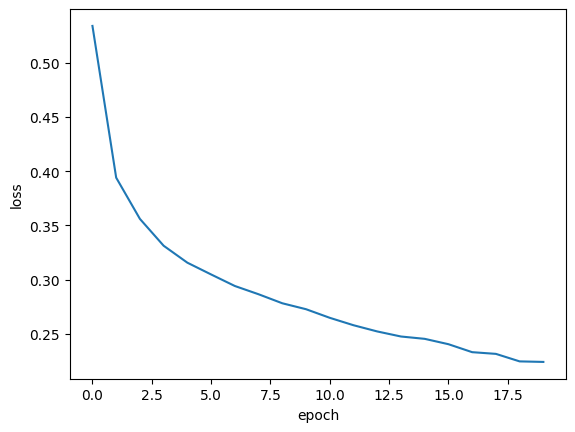

In [11]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=["accuracy"])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## Validation loss

In [14]:
model = model_fn()
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
              validation_data=(val_scaled, val_target))


In [15]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

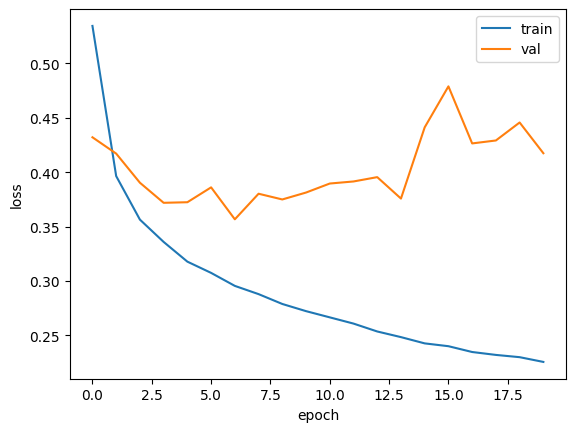

In [16]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

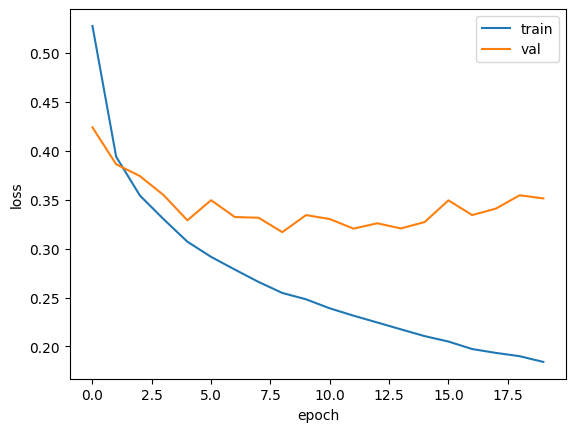

In [17]:
model = model_fn()
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
              validation_data=(val_scaled, val_target))
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [18]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

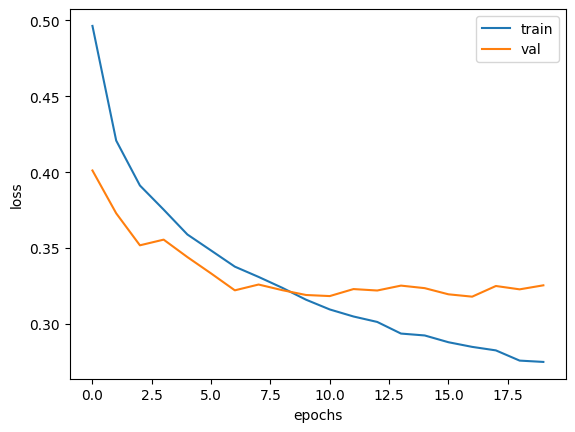

In [20]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

이 그림에서 validation loss와 train loss간 간격이 비슷해 학습이 잘 된 듯 하지만, 왼쪽 눈금을 잘 보아야 한다!!

결국 validation loss의 수렴 위치가 비슷하니 완전 나아졌다고 할 수 없다.

그래도 조금 괜찮아지긴 했다. (overfitting을 막는데 dropout이 효과적이다.)

In [21]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_scaled, train_target, epochs=11, verbose=0,
                    validation_data=(val_scaled, val_target))


.keras확장자를 가진 파일에 필요한 모든 정보를 압축해 저장

In [32]:
model.save("model-whole.keras")

훈련된 모델의 파라미터만 저장.

In [36]:
model.save_weights("model.weights.h5")

In [37]:
!ls -al model*

-rw-r--r-- 1 root root 335776 Nov 11 04:33 model.weights.h5
-rw-r--r-- 1 root root 978959 Nov 11 04:30 model-whole.keras
-rw-r--r-- 1 root root 976600 Nov 11 04:30 model-whole.weights.h5


Weight만 저장한 모델 로드하기

In [42]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights("model.weights.h5")

In [43]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_labels == val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


np.float64(0.08641666666666667)

In [44]:
model = keras.models.load_model("model-whole.keras")
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8846 - loss: 0.3319


[0.336526483297348, 0.8811666369438171]

## Callback

어떤 이벤트가 발생하면 호출되는 함수.

딥러닝은 에폭 중간중간에 호출할 때가 있다.

In [46]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-model.keras",
                                                save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [47]:
model = keras.models.load_model("best-model.keras")
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8877 - loss: 0.3129


[0.3155863583087921, 0.8848333358764648]

Early Stopping Callback

patient parameter : 검증 점수가 향상되지 않아도 참을 에포크 횟수 지정

In [49]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-model.keras",
                                                save_best_only=True)
# 2번 더 학습했는데 안좋아져서 멈췄을 경우, restore best weights는 최적 성능떄의 모델을 반환할지 결정.
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

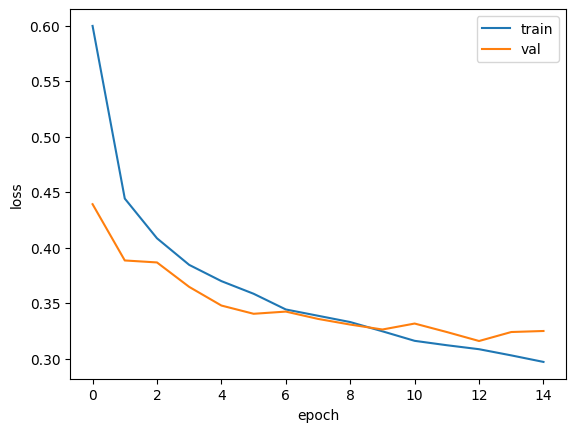

In [50]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [50]:
model.evaluate(val_scaled,val_target)

## PyTorch

In [67]:
from torchvision.datasets import FashionMNIST
from sklearn.model_selection import train_test_split

fm_train = FashionMNIST(root=".", train=True, download=True)
fm_test = FashionMNIST(root=".", train=False, download=True)

train_input = fm_train.data
train_target = fm_train.targets
train_scaled = train_input / 255.

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [68]:
import torch.nn as nn
import torch

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 100),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(100, 10),
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
device

device(type='cuda')

In [69]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [70]:
train_hist = []
val_hist = []
patience = 2
best_loss = -1
early_stopping_counter = 0

In [71]:
epochs = 20
batches = len(train_scaled) // 32
for epoch in range(epochs):
  model.train()
  train_loss = 0

  for batch in range(batches): # train
    inputs = train_scaled[batch*32:(batch+1)*32].to(device)
    targets = train_target[batch*32:(batch+1)*32].to(device)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()

  model.eval() # validate
  val_loss = 0
  with torch.no_grad():
    val_scaled = val_scaled.to(device)
    val_target = val_target.to(device)
    outputs = model(val_scaled)
    loss = criterion(outputs, val_target)
    val_loss += loss.item()

  train_hist.append(train_loss / batches)
  val_hist.append(val_loss)
  print(f"[epoch] : {epoch+1}, [train loss] : {train_loss/batches:.4f}, [val loss] : {val_loss:.4f}")

  if best_loss == -1 or val_loss < best_loss:
    best_loss = val_loss
    early_stopping_counter = 0
    torch.save(model.state_dict(), "best_model.weight.pt")
  else:
    early_stopping_counter += 1
  if early_stopping_counter >= patience:
    print(f"Training stopped at {epoch+1}")
    break

[epoch] : 1, [train loss] : 0.6088, [val loss] : 0.4390
[epoch] : 2, [train loss] : 0.4458, [val loss] : 0.3952
[epoch] : 3, [train loss] : 0.4103, [val loss] : 0.3759
[epoch] : 4, [train loss] : 0.3852, [val loss] : 0.3534
[epoch] : 5, [train loss] : 0.3692, [val loss] : 0.3455
[epoch] : 6, [train loss] : 0.3555, [val loss] : 0.3463
[epoch] : 7, [train loss] : 0.3446, [val loss] : 0.3384
[epoch] : 8, [train loss] : 0.3376, [val loss] : 0.3411
[epoch] : 9, [train loss] : 0.3258, [val loss] : 0.3460
Training stopped at 9


In [72]:
!ls -al best_*

-rw-r--r-- 1 root root 320577 Nov 11 05:07 best_model.weight.pt


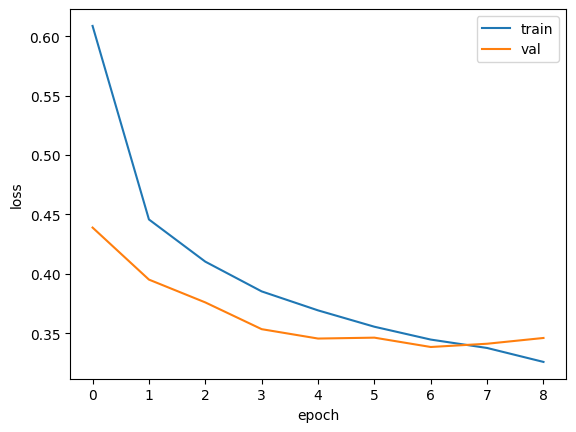

In [73]:
import matplotlib.pyplot as plt

plt.plot(train_hist, label="train")
plt.plot(val_hist, label="val")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [76]:
model.load_state_dict(
    torch.load("best_model.weight.pt", weights_only=True # 기본값은 False
))

<All keys matched successfully>

In [78]:
model.eval()
with torch.no_grad():
  val_scaled = val_scaled.to(device)
  val_target = val_target.to(device)
  outputs = model(val_scaled)
  predicts = torch.argmax(outputs, 1)
  corrects = (predicts == val_target).sum().item()

accuracy = corrects / len(val_target)
accuracy

0.8775